## Questions

1. What influences students performance the most?
2. How do boys and girls perform across states?
3. Do students from South Indian states really excel at Math and Science?

## Data Exploration

In [1]:
# loading dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# suppress all warnings
import warnings
warnings.filterwarnings('ignore')


marks = pd.read_csv('gramener-usecase-nas/nas-pupil-marks.csv')
labels = pd.read_csv('gramener-usecase-nas/nas-labels.csv')

In [2]:
marks.head(3)

,STUID,State,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,...,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %
0,11011001001,AP,1,1,3,3,1,5,2,1,...,3,3,4,3,4,4,20.37,NaN,27.78,NaN
1,11011001002,AP,1,2,3,4,2,5,2,2,...,3,4,4,3,4,4,12.96,NaN,38.18,NaN
2,11011001003,AP,1,2,3,4,2,5,2,1,...,3,4,3,3,4,4,27.78,70.0,NaN,NaN


In [3]:
# Column names of dataset
marks.columns

Index(['STUID', 'State', 'District', 'Gender', 'Age', 'Category',
       'Same language', 'Siblings', 'Handicap', 'Father edu', 'Mother edu',
       'Father occupation', 'Mother occupation', 'Below poverty',
       'Use calculator', 'Use computer', 'Use Internet', 'Use dictionary',
       'Read other books', '# Books', 'Distance', 'Computer use',
       'Library use', 'Like school', 'Subjects', 'Give Lang HW',
       'Give Math HW', 'Give Scie HW', 'Give SoSc HW', 'Correct Lang HW',
       'Correct Math HW', 'Correct Scie HW', 'Correct SocS HW',
       'Help in Study', 'Private tuition', 'English is difficult',
       'Read English', 'Dictionary to learn', 'Answer English WB',
       'Answer English aloud', 'Maths is difficult', 'Solve Maths',
       'Solve Maths in groups', 'Draw geometry', 'Explain answers',
       'SocSci is difficult', 'Historical excursions', 'Participate in SocSci',
       'Small groups in SocSci', 'Express SocSci views',
       'Science is difficult', 'Observe e

In [4]:
# The shape of data
marks.shape

(185348, 64)

In [5]:
# Splitting the columns into independent categories and performance
category = ['State', 'District', 'Gender', 'Age', 'Category',
       'Same language', 'Siblings', 'Handicap', 'Father edu', 'Mother edu',
       'Father occupation', 'Mother occupation', 'Below poverty',
       'Use calculator', 'Use computer', 'Use Internet', 'Use dictionary',
       'Read other books', '# Books', 'Distance', 'Computer use',
       'Library use', 'Like school', 'Subjects', 'Give Lang HW',
       'Give Math HW', 'Give Scie HW', 'Give SoSc HW', 'Correct Lang HW',
       'Correct Math HW', 'Correct Scie HW', 'Correct SocS HW',
       'Help in Study', 'Private tuition', 'English is difficult',
       'Read English', 'Dictionary to learn', 'Answer English WB',
       'Answer English aloud', 'Maths is difficult', 'Solve Maths',
       'Solve Maths in groups', 'Draw geometry', 'Explain answers',
       'SocSci is difficult', 'Historical excursions', 'Participate in SocSci',
       'Small groups in SocSci', 'Express SocSci views',
       'Science is difficult', 'Observe experiments', 'Conduct experiments',
       'Solve science problems', 'Express science views', 'Watch TV',
       'Read magazine', 'Read a book', 'Play games', 'Help in household']
performance = ['Maths %', 'Reading %', 'Science %', 'Social %']

# unique values in each category
for c in category:
    print (c,":",marks[c].unique())

State : ['AP' 'AR' 'BR' 'CG' 'DL' 'GA' 'GJ' 'HR' 'HP' 'JK' 'JH' 'KA' 'KL' 'MP' 'MH'
 'MN' 'MG' 'MZ' 'NG' 'OR' 'PB' 'RJ' 'SK' 'TN' 'TR' 'UP' 'UK' 'WB' 'AN' 'CH'
 'PY' 'DN' 'DD']
District : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28]
Gender : [1 2 0]
Age : [3 2 5 0 4 6 1]
Category : [3 4 0 1 2]
Same language : [1 2 0]
Siblings : [5 4 2 3 1]
Handicap : [2 0 1]
Father edu : [1 2 3 0 4 5]
Mother edu : [1 2 0 3 5 4]
Father occupation : [3 7 0 5 2 4 1 8 6]
Mother occupation : [3 5 2 0 1 6 4 7 8]
Below poverty : [0 1 2]
Use calculator : [1 2 0]
Use computer : ['No' nan 'Yes']
Use Internet : [1 2 0]
Use dictionary : [2 1 0]
Read other books : [2 1 0]
# Books : [2 4 1 0 3]
Distance : [1 2 3 4 0]
Computer use : [2 3 1 5 4 0]
Library use : [2 3 4 0 1 5]
Like school : [2 1 0]
Subjects : ['L' 'S' 'O' 'M' '0']
Give Lang HW : [4 0 1 3 2]
Give Math HW : [4 3 0 1 2]
Give Scie HW : [3 4 0 2 1]
Give SoSc HW : [3 4 0 2 1]
Correct Lang HW : [4 1 2 3 0]
Correct Math

### What influences students performance the most?

We defined a performance metric as 'performance' = average of ('Maths %', 'Reading %', 'Science %', 'Social %'). A feature selection is performed based on `SelectKBest` to evaluvate the relative importance in predicting performance. The top features were found for each subject as well as for average of all.

|Parameter|Best Feature |
| --- |:--- |
|Overall Performance|'Father edu'|
|Maths|'Help in household'|
|Reading|'Mother edu'|
|Science|'Father edu'|
|Social|'Help in household'|

This concludeds that the education of parents were the most decisive predictor in deciding a student's  performance. Among top features, 'Father edu' has distinctly higher scores for performance, almost **33%** higher than the second feature indicating a very high relevance.

In [6]:
# adding performance column as the average of all scores
# np.nanmean is used across the horizontal axis to avoid "NaN" values to calculate mean.
marks["performance"]=marks[performance].apply(np.nanmean, axis=1)
marks["performance"].describe()

count    180774.000000
mean         38.095342
std          14.949624
min           0.000000
25%          27.035000
50%          35.640000
75%          47.320000
max         100.000000
Name: performance, dtype: float64

In [ ]:
# no. of null values and corresponding columns
pd.isnull(marks).sum()[pd.isnull(marks).sum()!=0]

Use computer    19162
Maths %         92667
Reading %       92077
Science %       94356
Social %        95777
performance      4574
dtype: int64

    Column Name Level                Rename
208  State   AN    AN     Andaman & Nicobar
209  State   AP    AP        Andhra Pradesh
210  State   AR    AR     Arunachal Pradesh
211  State   BR    BR                 Bihar
212  State   CG    CG           Chattisgarh
213  State   CH    CH            Chandigarh
214  State   DD    DD           Daman & Diu
215  State   DL    DL                 Delhi
216  State   DN    DN  Dadra & Nagar Haveli
217  State   GA    GA                   Goa
218  State   GJ    GJ               Gujarat
219  State   HP    HP      Himachal Pradesh
220  State   HR    HR               Haryana
221  State   JH    JH             Jharkhand
222  State   JK    JK       Jammu & Kashmir
223  State   KA    KA             Karnataka
224  State   KL    KL                Kerala
225  State   MG    MG             Meghalaya
226  State   MH    MH           Maharashtra
227  State   MN    MN               Manipur
228  State   MP    MP        Madhya Pradesh
229  State   MZ    MZ           

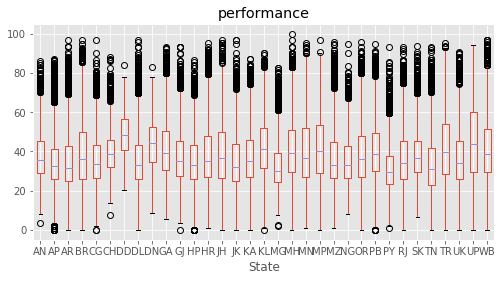

Empty DataFrame
Columns: [Column, Name, Level, Rename]
Index: []


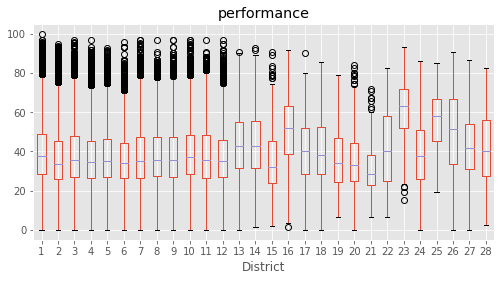

   Column  Name Level Rename
0  Gender   Boy     1    Boy
1  Gender  Girl     2   Girl


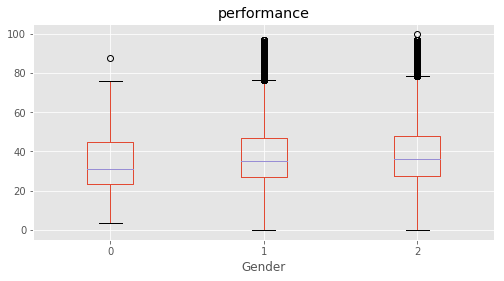

  Column                Name Level     Rename
2    Age            12 years     2   12 years
3    Age            13 years     3   13 years
4    Age            14 years     4   14 years
5    Age            15 years     5   15 years
6    Age  16 years and above     6  16+ years
7    Age       Upto 11 years     1  11- years


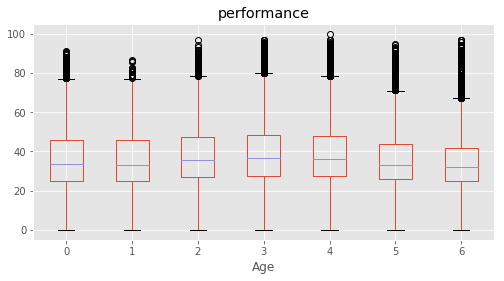

      Column Name Level Rename
8   Category    0     0      0
9   Category    1     1      1
10  Category    2     2      2
11  Category    3     3      3
12  Category    4     4      4


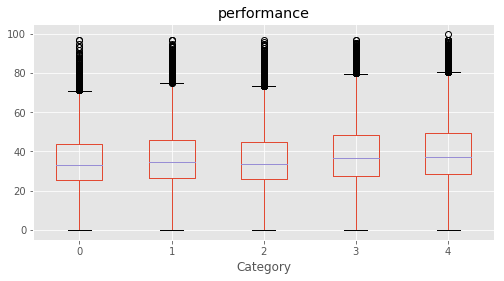

           Column Name Level Rename
13  Same language    0     0      0
14  Same language    1     1      1
15  Same language    2     2      2


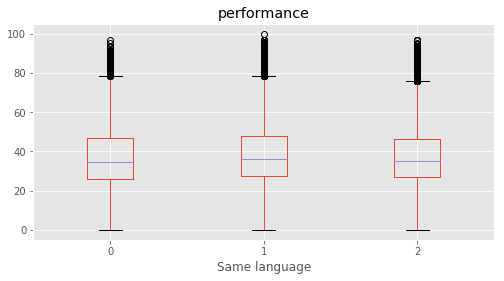

      Column                 Name Level        Rename
16  Siblings            1 sibling     1     1 sibling
17  Siblings            2 sibling     2    2 siblings
18  Siblings            3 sibling     3    3 siblings
19  Siblings  4 and above sibling     4   4+ siblings
20  Siblings         Single Child     0  Single child


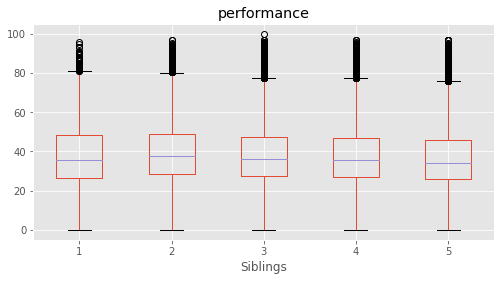

      Column Name Level   Rename
21  Handicap    0     0  Unknown
22  Handicap    1     1      Yes
23  Handicap    2     2       No


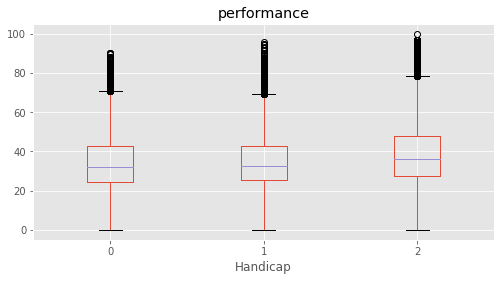

        Column                    Name Level          Rename
24  Father edu        Degree and above     5  Degree & above
25  Father edu              Illiterate     1      Illiterate
26  Father edu          Not applicable     0  Not applicable
27  Father edu           Primary level     2         Primary
28  Father edu         Secondary level     3       Secondary
29  Father edu  Senior secondary level     4    Sr secondary


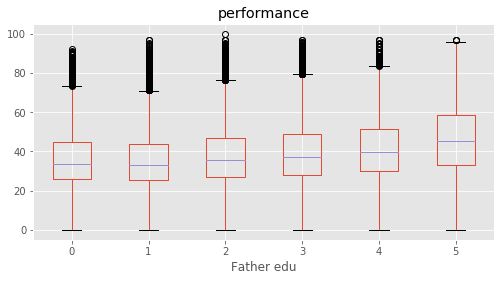

        Column                    Name Level          Rename
30  Mother edu        Degree and above     5  Degree & above
31  Mother edu              Illiterate     1      Illiterate
32  Mother edu          Not applicable     0  Not applicable
33  Mother edu           Primary level     2         Primary
34  Mother edu         Secondary level     3       Secondary
35  Mother edu  Senior secondary level     4    Sr secondary


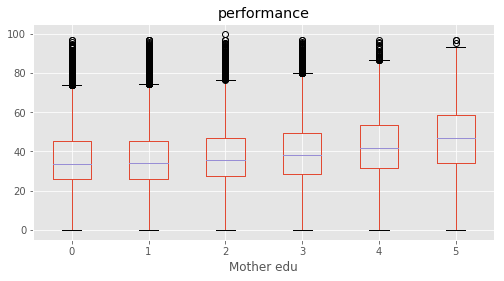

               Column                                 Name Level  \
36  Father occupation                                Clerk     4   
37  Father occupation                          Do not know     0   
38  Father occupation                               Farmer     3   
39  Father occupation                             Labourer     2   
40  Father occupation  Manager/Senior Officer/Professional     8   
41  Father occupation              Shopkeeper/ Businessman     6   
42  Father occupation                       Skilled Worker     5   
43  Father occupation           Teacher/Lecturer/Professor     7   
44  Father occupation                           Unemployed     1   

              Rename  
36             Clerk  
37       Do not know  
38            Farmer  
39          Labourer  
40      Professional  
41          Business  
42    Skilled Worker  
43  Teacher/Lecturer  
44        Unemployed  


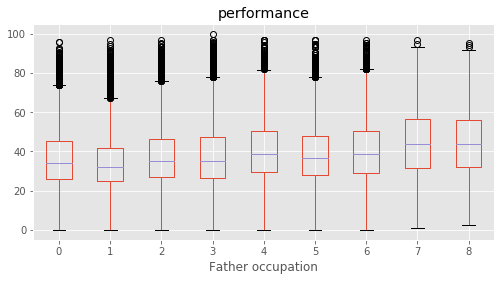

               Column                                 Name Level  \
45  Mother occupation                                Clerk     4   
46  Mother occupation                          Do not know     0   
47  Mother occupation                               Farmer     3   
48  Mother occupation                             Labourer     2   
49  Mother occupation  Manager/Senior Officer/Professional     8   
50  Mother occupation              Shopkeeper/ Businessman     6   
51  Mother occupation                       Skilled Worker     5   
52  Mother occupation           Teacher/Lecturer/Professor     7   
53  Mother occupation                           Unemployed     1   

              Rename  
45             Clerk  
46       Do not know  
47            Farmer  
48          Labourer  
49      Professional  
50          Business  
51    Skilled Worker  
52  Teacher/Lecturer  
53        Unemployed  


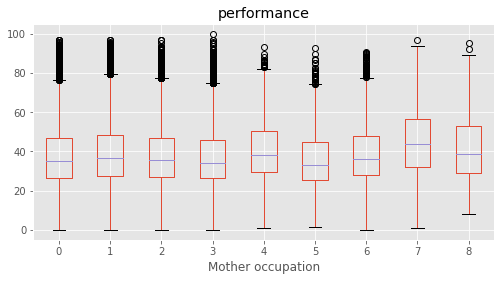

           Column        Name Level      Rename
54  Below poverty  Don't know     0  Don't know
55  Below poverty          No     1          No
56  Below poverty         Yes     2         Yes


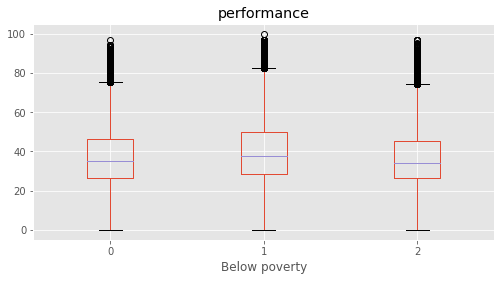

            Column Name Level Rename
57  Use calculator   No     1     No
58  Use calculator  Yes     2    Yes
59  Use calculator   No     1     No
60  Use calculator  Yes     2    Yes


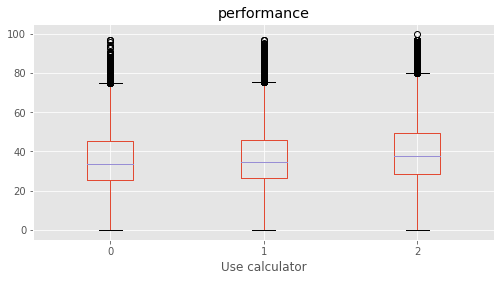

Empty DataFrame
Columns: [Column, Name, Level, Rename]
Index: []


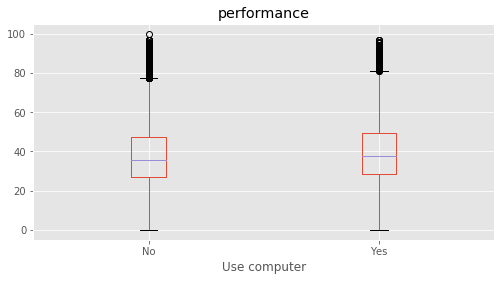

          Column Name Level Rename
61  Use Internet   No     1     No
62  Use Internet  Yes     2    Yes


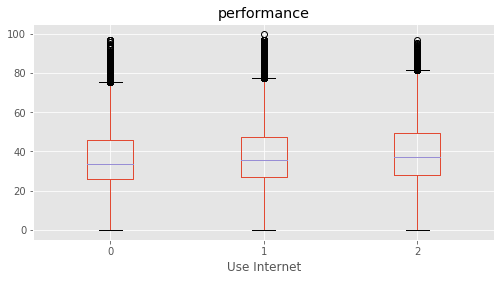

            Column Name Level Rename
63  Use dictionary   No     1     No
64  Use dictionary  Yes     2    Yes


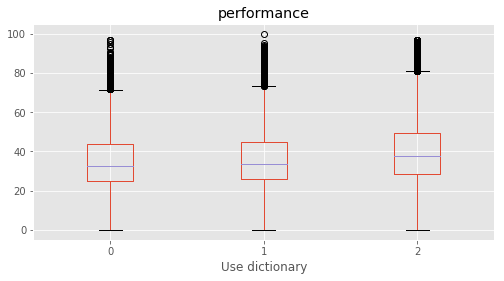

              Column Name Level Rename
65  Read other books   No     1     No
66  Read other books  Yes     2    Yes


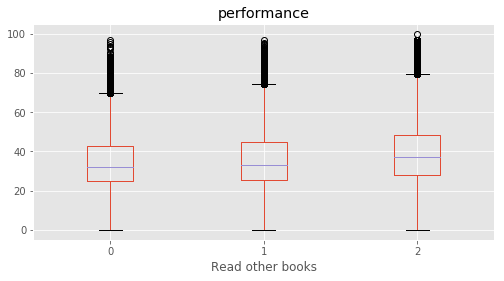

     Column                Name Level        Rename
67  # Books        11to25 books     3  11-125 books
68  # Books         1to10 books     2    1-10 books
69  # Books  More than 25 books     4     25+ books
70  # Books            No books     1      No books


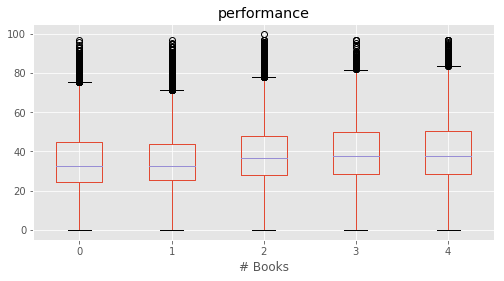

      Column                 Name Level          Rename
71  Distance  More than 1 to 3 km     2          1-3 km
72  Distance  More than 3 to 5 km     3          3-5 km
73  Distance       More than 5 km     4  More than 5 km
74  Distance           Up to 1 km     1      Up to 1 km


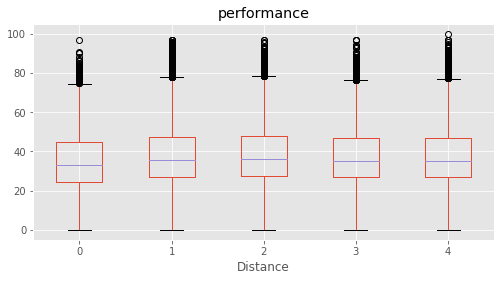

In [ ]:
# Plotting performance based on each category value in the dataframe

for c in category:
    marks.boxplot(column="performance", by=c,figsize=(8, 4))
    print (labels[labels["Column"]==c])
    plt.suptitle("")
    plt.show()

In [ ]:
def clean_data(marks, y_col_name="performance"):
    # Creating traning set X and target y
    from sklearn.preprocessing import LabelEncoder

    # Remove all rows with performance is undefined i.e. "NaN" 
    marks_nona = marks.dropna(subset=[y_col_name])

    # Cloning marks to make a training set X
    X = marks_nona[category].copy(deep=True)

    # string encoded columns are converted to np array to create training set x
    encoded_columns = ["State","Use computer", "Subjects"]
    le_state = LabelEncoder()
    le_subject = LabelEncoder()
    le_use_comp = LabelEncoder()
    X["State"] = le_state.fit_transform(X["State"])
    X["Subjects"] = le_subject.fit_transform(X["Subjects"])
    X["Use computer"] = le_use_comp.fit_transform(X["Use computer"].fillna(value="0"))

    print("Shape of X\t:",X.shape)

    # target variable y 
    y = marks_nona[y_col_name]
    print ("Shape of y\t:",y.shape)
    return X, y

In [ ]:
def best_features(X,y):
    # Pipeline is defined for feature selection
    from sklearn.feature_selection import SelectKBest,f_regression,mutual_info_regression
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler

    pipe = Pipeline(steps = [('scaler', StandardScaler()),\
                                ('selK', SelectKBest(k="all",score_func=f_regression))])
    pipe.fit(X.astype(float).values,y.astype(float).values)

    # score of top 10 features is sorted in descending order
    k_scores = pipe.named_steps["selK"].scores_
#     k_scores = k_scores/sum(k_scores)
    scores_tuple = zip(X.columns,k_scores)
    sorted_scores = sorted(scores_tuple,key=lambda score:score[1], reverse=True)
    print ("Best 5 Features:\n",sorted_scores[:5])
    
    # Plotting the best features
    fig=plt.figure(figsize=(12,5))
    plt.bar(np.arange(len(k_scores)),k_scores,label = X.columns)
    plt.axhline(y=max(k_scores)*0.6,color='b',linewidth=.5)
    plt.xticks(np.arange(len(k_scores)),X.columns,rotation="vertical")
    plt.ylabel("K-Scores")
    plt.show()
    
    return sorted_scores

def tuple_to_dict(scores_tuple):
    """
    converts an array of tuple (key,value) to a dictionary {key:value}
    """
    i = 0;
    my_dict = {}
    while i<len(scores_tuple):
        key, value = scores_tuple[i]
        my_dict.update({key : value})
        i = i+1
    return my_dict
    

In [ ]:
target = ["performance","Maths %","Reading %","Science %","Social %"]
final_stat = {}

for t in target:
    print("======\tTarget Variable\t:",t,"======")
    X, y = clean_data(marks,y_col_name=t)
    sorted_scores = best_features(X,y)
    final_stat.update({t : tuple_to_dict(sorted_scores)})
    best_f = sorted_scores[0][0]
    
    # plotting
    marks.boxplot(column=t, by=best_f,figsize=(8,5))
    plt.title(t)
    plt.tight_layout()
    plt.suptitle("")
    print (labels[labels["Column"]==best_f])
    plt.show()

In [ ]:
# K-scores are normalized by maximum score (along each row) to show the strongest predictor for each row
import seaborn as sns
s = pd.DataFrame.from_dict(final_stat, orient='index')
final = s.divide(s.max(axis=1),axis = 0)

# plotting heat map 
plt.figure(figsize=(15,2))
f = sns.heatmap(final, linewidths = 1,square= False, cbar= False, vmin=0.2)
plt.suptitle("Coloring based on K-Score (Darker color indicates stonger influence)")
plt.show()

### How do boys and girls perform across states?

Across most states Girls tend to have a higher median performance than boys.

Some states with notable exception to this rule are Jharkand (JH) and Bihar (BH). Since these state have high gender inequality, this trend could be due to lack of access/support to educational resources to girls compared to boys. There could be other intrinsic reasons as it needs additional supporting data.

Of the states where girls perform better, Kerala and Delhi stands out. Both states showed that median performance of girls is almost 4% higher than boys.

In [ ]:
# Eliminating Gender not equal to 1 or 2
marks_gender = marks.dropna(subset=["performance"])
marks_gender =marks_gender[marks_gender["Gender"]!=0]
marks_gender.boxplot(column="performance", by=["State","Gender"], figsize=(12, 3))
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
# Aggregating median performance based on "State" and "Gender"
G_perfomance = marks_gender.groupby(["State","Gender"]).median()["performance"].reset_index()

# pivoting the dataframe to include columns "Boy" and "Girl" and renaming them
G_perfomance = G_perfomance.pivot(index='State', columns='Gender', values='performance')
G_perfomance.columns = ["Boy","Girl"]

# Adding column "diff" with the differenc ein median performance of boys and girls
G_perfomance["diff"]=G_perfomance["Boy"]-G_perfomance["Girl"]

G_perfomance.head()

In [ ]:
# Aggregating count of Gender based on "State" and "Gender"
G_count = marks_gender.groupby(["State","Gender"]).count()[["STUID"]].reset_index()

# pivoting the dataframe to include columns "Boy" and "Girl" and renaming them
G_count = G_count.pivot(index='State', columns='Gender', values='STUID')
G_count.columns = ["Boy","Girl"]
G_count["ratio"] = G_count["Boy"]/G_count["Boy"]
G_count.head()

In [ ]:
import matplotlib.colors as colors
from matplotlib.cm import bwr as cmap
import matplotlib.patches as mpatches

plt.figure(figsize=(12,5))

# setting colors. Maps the max and min values in "diff" to a color map bwr
c_normal = colors.PowerNorm(.1,vmin=min(G_perfomance["diff"]), vmax=max(G_perfomance["diff"]))
_COLORS = cmap(c_normal(G_perfomance["diff"]))

plt.bar(np.arange(len(G_perfomance["diff"])), 
        height = G_perfomance["diff"], width = 0.75, align = "center",\
        color=_COLORS)
plt.xticks(np.arange(len(G_perfomance.index)),list(G_perfomance.index))
plt.axhline(0, color='k', linewidth = 0.5)
plt.xlabel("State")
plt.ylabel("Median Performance Difference\n(Boys - Girls)")

# creating legend patches
red_patch = mpatches.Patch(color='red', label='Boys Perform Better')
blue_patch = mpatches.Patch(color='blue', label='Girls Perform Better')
plt.legend(handles=[red_patch, blue_patch], loc=4)

plt.show()

In [ ]:
fig = plt.figure(figsize = (5,14),dpi=7)

ax = fig.add_subplot(111)
ax2 = ax.twiny()

# bar plots on first axis ax
ax.barh(np.arange(len(G_perfomance["Boy"])),\
         width = G_perfomance["Boy"],height = 0.1, color="k",\
        align = "center", alpha =0.25, linewidth = 0)
ax.barh(np.arange(len(G_perfomance["Girl"])),\
         width = -G_perfomance["Girl"],height = 0.1, color="k",\
        align = "center", alpha =0.25, linewidth = 0)

# scatter plots on first axis ax with marker size mapped on to sampe size
ax.scatter(x = G_perfomance["Boy"],\
            y = np.arange(len(G_perfomance["diff"])),\
            s = G_count["Boy"]*0.1,\
            color = "k", alpha =0.5)
ax.scatter(x = -G_perfomance["Girl"],\
            y = np.arange(len(G_perfomance["diff"])),\
            s = G_count["Girl"]*0.1,\
            color = "k", alpha =0.5)


# First x-axis
ax.set_xlim(-60, 60)
ax.set_xticklabels([str(abs(x)) for x in ax.get_xticks()]) # changing the x ticks to remove "-"
ax.set_xlabel("Median performance")

for a in [100,500]:
    ax.scatter([],[],c='k', alpha=0.5, s=a,label = "{0}".format(a*10))

# Second x-axis
ax2.barh(np.arange(len(G_perfomance["diff"])), 
        width = G_perfomance["diff"], height = 0.75, align = "center",\
        color=_COLORS)

ax2.set_xlim(-10, 10)
ax2.grid(False)
ax2.set_xlabel("Median performance difference (Boys - Girls)")

# y-axis
ax.set_ylim(-1, len(G_perfomance.index)+2)
plt.yticks(np.arange(len(G_perfomance.index)),list(G_perfomance.index))
plt.axvline(x= 0, color='k', linewidth = 0.75, ymax = 0.94)

# legend
red_patch = mpatches.Patch(color='red', label='Boys Perform Better')
blue_patch = mpatches.Patch(color='blue', label='Girls Perform Better')
plt.legend(handles=[blue_patch, red_patch], loc=2, ncol =1, mode = "expand")
ax.legend(loc=1,ncol=2)


# annotation patch
tboy = ax.text(50, -2.2, "Boys", ha="center", va="center", rotation=0,
            size=10,color = "w",
            bbox=dict(boxstyle="rarrow,pad=0.3", fc="grey", ec="b", lw=0))
tgirl = ax.text(-50, -2.2, "Girls", ha="center", va="center", rotation=0,
            size=10,color = "w",
            bbox=dict(boxstyle="larrow,pad=0.3", fc="grey", ec="b", lw=0))

plt.show()

In [ ]:
# Sorted list of States with higher performance for Boys
G_perfomance[G_perfomance["diff"]>0].sort_values("diff", ascending=False)

In [ ]:
# Sorted list of States with higher performance for Girls
G_perfomance[G_perfomance["diff"]<0].sort_values("diff", ascending=True)

### Do students from South Indian states really excel at Math and Science?

In order to do the analysis, Here we considered southern states as : "Andhra Pradesh", "Kerala", "Karnataka" and "Tamil Nadu". Meanwhile other states are referred to "the rest of the country". The performance score for 'Science and Math' is defined as the mean value of both 'Science' and 'Math'. 

We found that central tendendencies of `Southern States` to be slight lower than the rest of the country. But it should be noted that the number of samples in the `Southern States` is far less. Also, it should be understood that the enrollment rate of southern states is usually higher than rest of country which could be driving down the median values.

To identify if all southern states follow this pattern, we split the data into corresponding southern states. We found that "Kerala" as a notable exception to the trend of southern states. "Kerala" tends to have higher median score than other southern states, rest of the country and the overall median of country. Another exception is the distribution of marks from "Tamil Nadu" with longer tails. "Tamil Nadu" followed the trend of the rest of the country with longer tails at highest end but has lower median score than all others.

In [ ]:
marks['math_sci'] = marks[['Maths %','Science %']].apply(np.nanmean,axis=1)

In [ ]:
# Defining a dataframe "south" with columns = [state,math_science]. 
south = marks[['State','Maths %','Science %','math_sci']].dropna(subset=['Maths %','Science %'])
print (south.isnull().sum())
print(south.columns)

In [ ]:
# separating southern states from rest of the country
STATES = list(south["State"].unique())
SOUTH_STATES = ["KL", "AP","TN","KA"]
REST = [S for S in STATES if S not in SOUTH_STATES]
south["is_south"] = south["State"].isin(SOUTH_STATES)

# function to add a new column "south_vs_rest"
def add_col_south_vs_rest(south,SOUTH_STATES):
    """
    Returns a new lst with south["state"] as 
    the value if the state is in SOUTH_STATES, 
    else with the value "Rest"
    """
    lst = []
    for index in range(south.shape[0]):
        state = south.iloc[index]["State"]
        if state in SOUTH_STATES:
            lst.append(state)
        else:
            lst.append("Rest")
    return lst
south["south_vs_rest"] = add_col_south_vs_rest(south,SOUTH_STATES)
south.tail(2)

In [ ]:
print (south.describe())
south.groupby(by = "is_south").describe()

In [ ]:
for factor in ["math_sci","Maths %","Science %"]:
    fig = south.boxplot(column = factor, by ="is_south")
    plt.axhline(south[factor].median(), color='k', linewidth = 0.5, linestyle ="--",\
                label="Median Score of Country")
    plt.ylabel(" %")
    fig.set_xticklabels(["rest of the country","southern states"])
    plt.suptitle("")
    plt.xlabel("")
    plt.legend()
    plt.show()

In [ ]:
plt.figure(1)
sns.countplot(x="is_south", data=south)
plt.figure(2)
sns.countplot(x="south_vs_rest", data=south)
plt.show()

In [ ]:
# sns.stripplot(x="is_south", y="math_sci",data=south, jitter=True, alpha=0.2)
plt.figure(figsize = (10,6))
f = sns.violinplot(x="is_south", y="math_sci",data=south, fliersize=0, width = .3, notch =True, linewidth =1)
plt.axhline(south["math_sci"].median(), color='r', linewidth = 1, linestyle ="--",\
                label="Median Score of Country")
f.set_xticklabels(["rest of the country","southern states"])

# plotting the count data
plt.scatter(x = south.groupby("is_south").count()["State"].index,\
            y = [-10.0,-10.0],\
            s = south.groupby("is_south").count()["State"].values/25,\
            c="k", linewidth=1,alpha =0.4, label = "Sample size")

plt.suptitle("Math and Science Score")
plt.xlabel("")
plt.ylabel("%")
plt.legend(loc =8)
plt.show()

In [ ]:
# spltting each southern state to compare with the rest of the country
for factor in ["math_sci","Maths %","Science %"]:
    fig = south.boxplot(column = factor, by ="south_vs_rest")
    plt.axhline(south[factor].median(), color='k', linewidth = 0.5, linestyle ="--",\
                label="Median Score of Country")
    plt.ylabel(" %")
    plt.suptitle("")
    plt.xlabel("")
    plt.legend()
    plt.show()

In [ ]:
count = south.groupby("south_vs_rest").count()["State"].reindex(index=["Rest","AP","KA","KL","TN"])

In [ ]:
# Math and science score for each of the southern state
plt.figure(figsize = (10,6))

f = sns.violinplot(x="south_vs_rest", y="math_sci",data=south,\
                   fliersize=0, width = .3, notch =True, linewidth =1,\
                  order=["Rest","AP","KA","KL","TN"])
plt.axhline(south["math_sci"].median(), color='r', linewidth = 1, linestyle ="--",\
                label="Median Score of Country")
f.set_xticklabels(["Rest of the\ncountry","Andhra\nPradesh","Karnataka","Kerala", "Tamil\nNadu"])

plt.scatter(x =[0,1,2,3,4], y=[-10,-10,-10,-10,-10],s = count/15,\
            label ="Sample size", alpha =0.3,color ="k",linewidth=1,\
            linestyle ="solid")

plt.suptitle("Math and Science Score")
plt.xlabel("")
plt.ylabel("%")
plt.legend()
# plt.twinx()
# sns.countplot(x="south_vs_rest", data=south, width = 0.2)
plt.show()